# **Definición del problema:** 
<h2>Información</h2>
El conjunto de datos contiene 1000 entradas con 20 atributos entre numericos y categoricos. En este conjunto de datos, cada fila representa a una persona que toma un crédito de un banco. Cada persona se clasifica como riesgo de crédito bueno o malo según sus atributos.

Este es un ejemplo de lo que se conoce como ‘credit score‘, el cual refleja un panorama sobre cómo ha sido el comportamiento como deudor, a partir de sus hábitos de pago de cuentas abiertas y cerradas, así como del uso y manejo de productos financieros.
Este es una referencia para las empresas, entidades bancarias y financieras a la hora de decidir otorgar un crédito


<h2>Atributos</h2>
A continuación describimos algunos de los atributos codificados en el dataset:<br>
(DM) traduce Marcos Alemanes <i>'Moneda antes de 2002'</i>, el factor de conversión a euros es: 1 EUR ~ 1,9558 DM

<b> Categóricos </b><br>
'checkin_account':<br>
- 'A11': '< 0 DM'<br>
- 'A12': ' 0 - 200 DM'<br>
- 'A13': '> 200 DM'<br>
- 'A14': 'No Account'<br> 

'credit_history':<br>
- A30: 'No credit/Paid Back Duly'<br>
- A31: 'All Credit Paid Back Duly'<br>
- A32: 'Existing credit Paid Back Duly'<br>
- A33: 'delay in paying off in the past'<br>
- A34: 'critical account/ other credits existing (not at this bank)'}<br> 

Purpose <br>
- A40 : car (new) <br>
- A41 : car (used) <br>
- A42 : furniture/equipment <br>
- A43 : radio/television <br>
- A44 : domestic appliances <br>
- A45 : repairs <br>
- A46 : education <br>
- A47 : (vacation - does not exist?) <br>
- A48 : retraining <br>
- A49 : business <br>
- A410 : others <br>

Savings account<br>
- A61 : ... < 100 DM<br> 
- A62 : 100 <= ... < 500 DM <br>
- A63 : 500 <= ... < 1000 DM <br>
- A64 : .. >= 1000 DM <br>
- A65 : unknown/ no savings account <br>

Present employment since <br>
- A71 : unemployed <br>
- A72 : ... < 1 year <br>
- A73 : 1 <= ... < 4 years <br>
- A74 : 4 <= ... < 7 years <br>
- A75 : .. >= 7 years <br>

Personal status and sex <br>
- A91 : male : divorced/separated <br>
- A92 : female : divorced/separated/married <br>
- A93 : male : single <br>
- A94 : male : married/widowed <br>
- A95 : female : single <br>

Other debtors <br>
- A101 : none <br>
- A102 : co-applicant <br>
- A103 : guarantor <br>

Property <br>
- A121 : real estate <br>
- A122 : if not A121 : building society savings agreement/ life insurance <br>
- A123 : if not A121/A122 : car or other, not in attribute 6 <br>
- A124 : unknown / no property <br>

Other installment plans <br>
- A141 : bank <br>
- A142 : stores <br>
- A143 : none <br>

Housing <br>
- A151 : rent <br>
- A152 : own <br>
- A153 : for free<br> 

Job <br>
- A171 : unemployed/ unskilled - non-resident <br>
- A172 : unskilled - resident <br>
- A173 : skilled employee / official <br>
- A174 : management/ self-employed/ highly qualified employee/ officer <br>

Telephone <br>
- A191 : none <br>
- A192 : yes, registered under the customers name <br>

foreign worker <br>
- A201 : yes <br>
- A202 : no <br>

<b> numéricos </b><br>
'duration':&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Duración en meses <br>
'credit_amount':&nbsp;&nbsp;&nbsp;&nbsp; Monto de crédito en DM <br>
'interest_rate':&nbsp;&nbsp;&nbsp;&nbsp; Tasa de pago (en porcentaje del ingreso disponible) <br>
'residing_since': &nbsp;&nbsp;&nbsp;&nbsp;Residencia actual desde<br>
'age': &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Edad en años<br>
'num_credits':&nbsp;&nbsp;&nbsp;&nbsp; Número de créditos existentes con el banco<br>
'dependents':&nbsp;&nbsp;&nbsp;&nbsp; Número de personas que es responsable<br>

<b>Target value </b><br>
<b> status </b> :  (1)&nbsp;Good or (2)&nbsp;Bad - 'Riesgo' <br>

# **Librerias:** 
- Importando Librarias necesarias


In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML # Tabla completa
#---------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score ,ShuffleSplit,learning_curve
from sklearn.dummy import DummyClassifier
from collections import defaultdict
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
#-Models--------------------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#Graficos-------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sn
from mlxtend.plotting import plot_confusion_matrix

from ipywidgets import interact
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.models.widgets import Select ,Paragraph
from bokeh.layouts import widgetbox ,row
%matplotlib inline
output_notebook()

Loading BokehJS ...

# **Datos Fuente:** 
- Importando Datos y renombrando atributos

In [3]:
dataset = pd.read_csv('data/GermanCreditData.csv', encoding='latin-1')
columns = ['checkin_account', 'duration', 'credit_history', 'purpose', 'credit_amount','saving_account', 'present_empl_since',
           'interest_rate', 'personal_status','other_debtors', 'residing_since', 'property', 'age','other_install_plans',
           'housing', 'num_credits','job', 'dependents', 'telephone', 'foreign_worker', 'status']
dataset.columns = columns
dataset['sex'] = dataset['personal_status'].map({'A91': 'M','A92': 'F','A93': 'M','A94': 'M','A95': 'F'})
varNumeric = list(dataset.select_dtypes(exclude=['object']).columns)
varDisc = list(dataset.select_dtypes(include=['object']).columns)
dataset['status'] = dataset['status'].map({1: 'Good', 2: 'Bad'})
HTML(dataset.head(7).to_html())

,checkin_account,duration,credit_history,purpose,credit_amount,saving_account,present_empl_since,interest_rate,personal_status,other_debtors,residing_since,property,age,other_install_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,sex
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,Good,M
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,Bad,F
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,Good,M
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,Good,M
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,Bad,M
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,Good,M
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,Good,M


In [4]:
#Informacion General de los atributos (cantidad, tipos y valores unicos)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 22 columns):
checkin_account        1001 non-null object
duration               1001 non-null int64
credit_history         1001 non-null object
purpose                1001 non-null object
credit_amount          1001 non-null int64
saving_account         1001 non-null object
present_empl_since     1001 non-null object
interest_rate          1001 non-null int64
personal_status        1001 non-null object
other_debtors          1001 non-null object
residing_since         1001 non-null int64
property               1001 non-null object
age                    1001 non-null int64
other_install_plans    1001 non-null object
housing                1001 non-null object
num_credits            1001 non-null int64
job                    1001 non-null object
dependents             1001 non-null int64
telephone              1001 non-null object
foreign_worker         1001 non-null object
status              

In [5]:
print(dataset.nunique())

checkin_account          4
duration                33
credit_history           5
purpose                 10
credit_amount          921
saving_account           5
present_empl_since       5
interest_rate            4
personal_status          4
other_debtors            3
residing_since           4
property                 4
age                     53
other_install_plans      3
housing                  3
num_credits              4
job                      4
dependents               2
telephone                2
foreign_worker           2
status                   2
sex                      2
dtype: int64


# **Exploración de los datos:** 

- Explorando variables categóricas


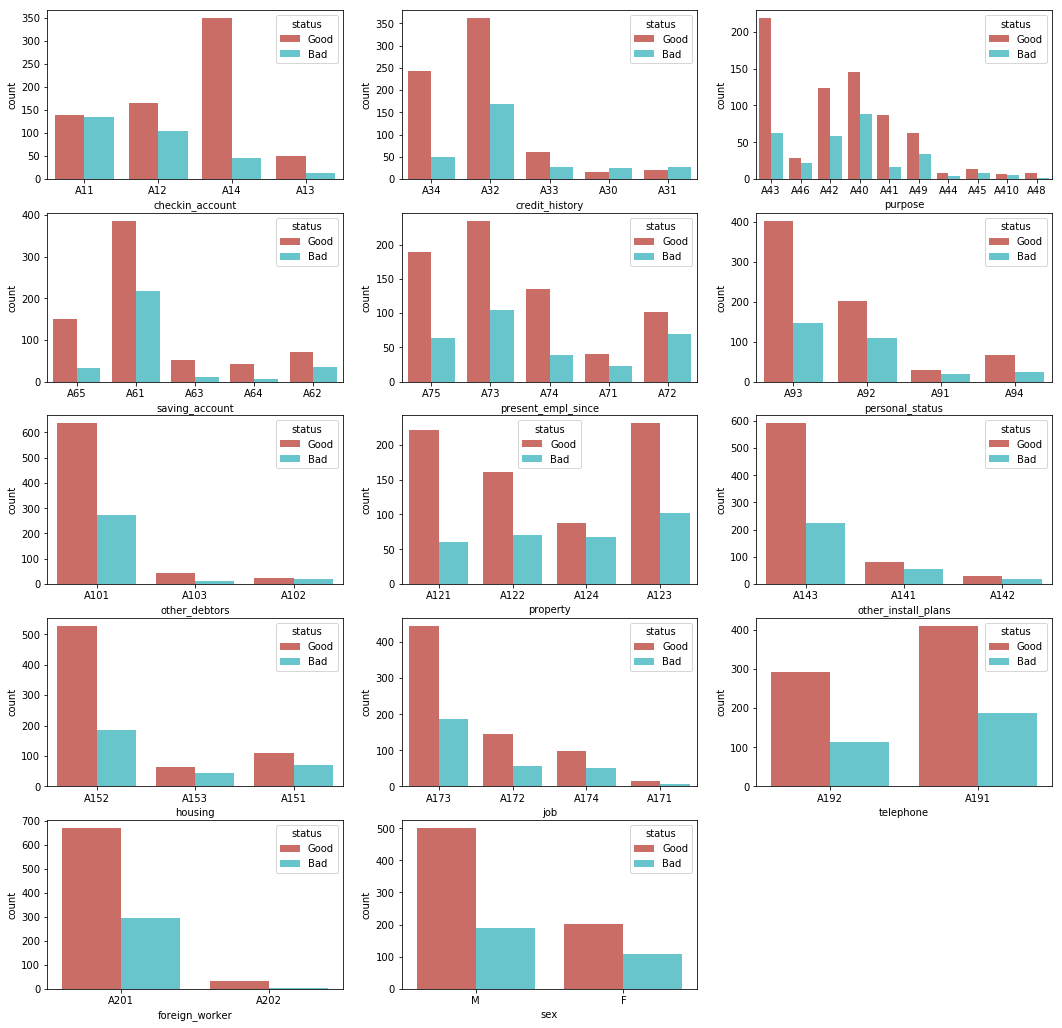

In [6]:
plt.figure(figsize = (18,18))
for i in range(1, len(varDisc)+1):
    plt.subplot(5, 3, i)
    sn.countplot(x=varDisc[i-1], data=dataset, palette="hls", hue = "status")

Parece conservarse una proporción en varios de los grupos al interior de los atributos cuando son comparados entre "Buenos" y "Malos”. <br>(<i>si se compara la barra roja contra la azul justo al lado</i>)<br>

Este dataset es un caso de un conjunto de datos desequilibrado, con el <b>70%</b> de los individuos clasificados como "buen crédito".<br> Por lo tanto, la precisión de un modelo de clasificación debería ser superior al <b>70%</b>, que sería la precisión del modelo ingenuo que clasifica a cada individuo como un buen crédito.<br>

In [7]:
pd.DataFrame(dataset.status.value_counts( normalize=True ) )

,status
Good,0.7003
Bad,0.2997


Analicemos algunos atributos donde visualmente es más apreciable alguna diferencia.

checkin_account       A11       A12       A13       A14
status                                                 
Bad              0.492701  0.388889  0.222222  0.116751
Good             0.507299  0.611111  0.777778  0.883249


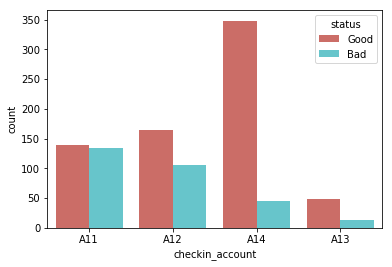

In [8]:
dataset['records'] = 1
g = sn.countplot(x="checkin_account", data=dataset, 
              palette="hls", hue = "status")
table = dataset.pivot_table(index='status',columns = 'checkin_account' ,values='records',aggfunc='sum')
print(table.div(table.sum(axis=0), axis=1))

Los clientes que <b>NO (A14)</b> tienen una cuenta o el monto en la cuenta es <b>mayor a 200DM (A13)</b> parecen tener una menor probabilidad de incurrir en un incumplimiento.(<i>Ver proporciones en tabla</i>)

saving_account       A61       A62       A63    A64       A65
status                                                       
Bad             0.359867  0.326923  0.174603  0.125  0.174863
Good            0.640133  0.673077  0.825397  0.875  0.825137


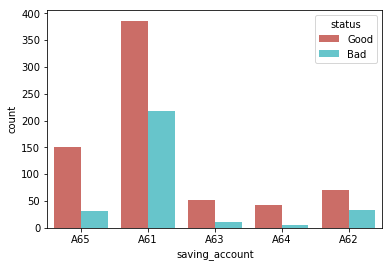

In [9]:
g = sn.countplot(x="saving_account", data=dataset, 
              palette="hls", hue = "status")
table = dataset.pivot_table(index='status',columns = 'saving_account' ,values='records',aggfunc='sum')
print(table.div(table.sum(axis=0), axis=1))
dataset.drop('records', axis=1, inplace=True)

Parece haber un comportamento similar con clientes que <b>NO (A65)</b> tienen una cuenta de ahorros o el monto en la cuenta es <b>mayor a 500DM (A63 - A64)</b> parecen tener una menor probabilidad de incurrir en un incumplimiento.(<i>Ver proporciones en tabla</i>)

<br>
- Explorando variables numéricas

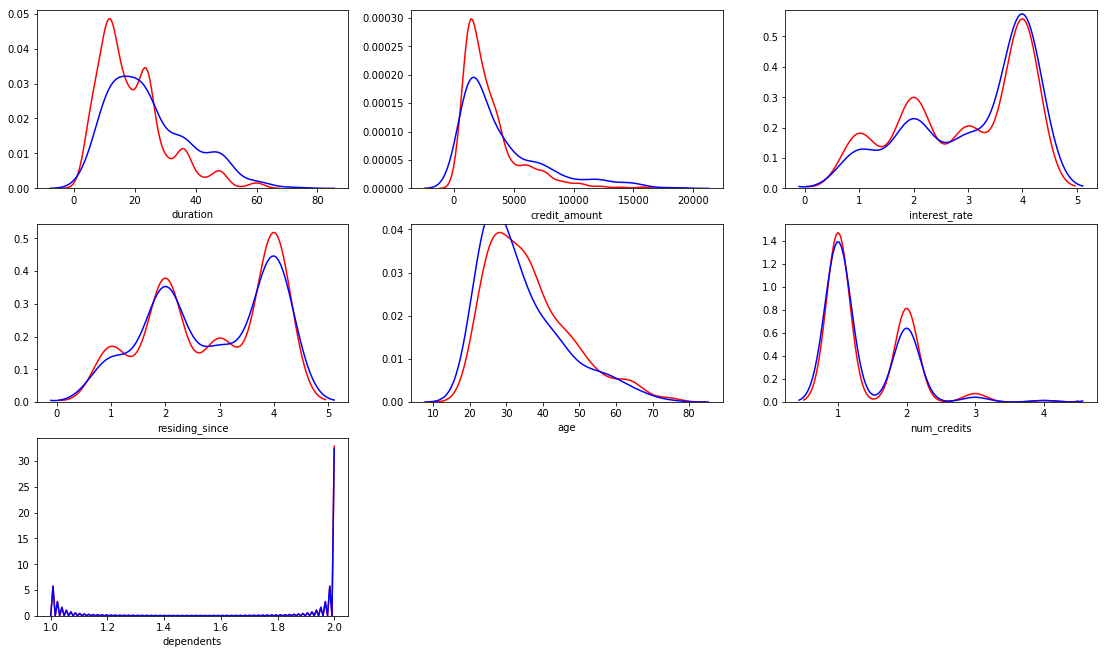

In [10]:
plt.figure(figsize = (19,19))
for i in range(1, len(varNumeric[::-1])):
    plt.subplot(5, 3, i)
    sn.distplot( dataset[varNumeric[i-1]][dataset.status == 'Good'], color = 'r', hist = False )
    sn.distplot( dataset[varNumeric[i-1]][dataset.status == 'Bad'], color = 'b', hist = False )


La variable "duration" alcanza a distinguir una diferencia entre buenos y malos, en los créditos por encima de 24 meses tiende a ser mayor el incumplimiento. <br> En la variable "age" parece haber un desplazamiento entre las 2 graficas. Miremos más a detalle estos atributos "age" y al monto del crédito "credit_amount".

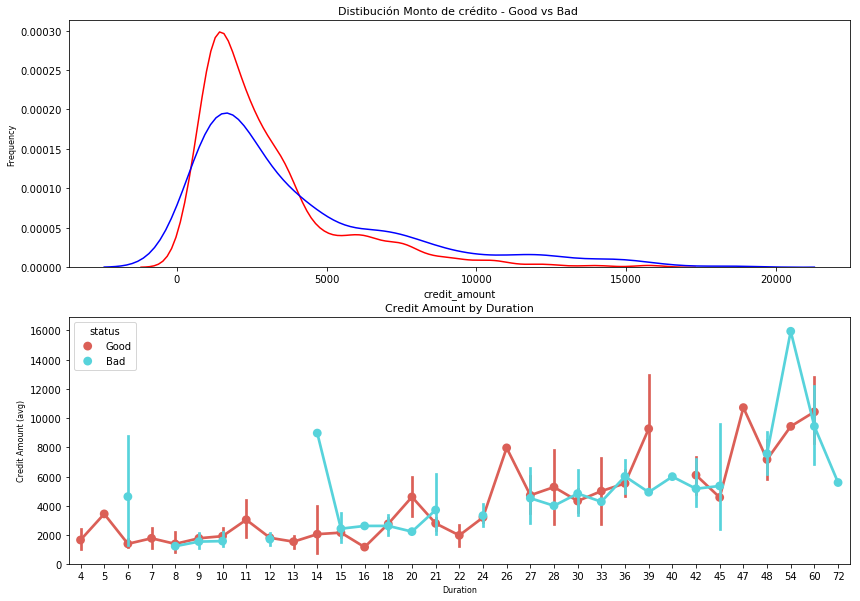

In [11]:
plt.figure(figsize = (14,10))
plt.subplot(211)
sn.distplot( dataset[dataset.status == 'Good'].credit_amount, color = 'r', hist = False )
sn.distplot( dataset[dataset.status == 'Bad'].credit_amount, color = 'b', hist = False )
plt.title("Distibución Monto de crédito - Good vs Bad ", fontsize = 11 )
plt.ylabel("Frequency", fontsize=8)

plt.subplot(212)
g1 = sn.pointplot(x="duration", y ="credit_amount",data=dataset,
                   hue="status", palette="hls")
g1.set_xlabel("Duration", fontsize=8)
g1.set_ylabel("Credit Amount (avg)", fontsize=8)
g1.set_title("Credit Amount by Duration", fontsize=11)

Observamos que los credito tienden a tener montos altos a mayor cantidad de meses.<br>
Los creditos cuando superan los <b>9000 DM </b> tiende a ser mayor su incumplimiento ,estos son comportamientos esperados.

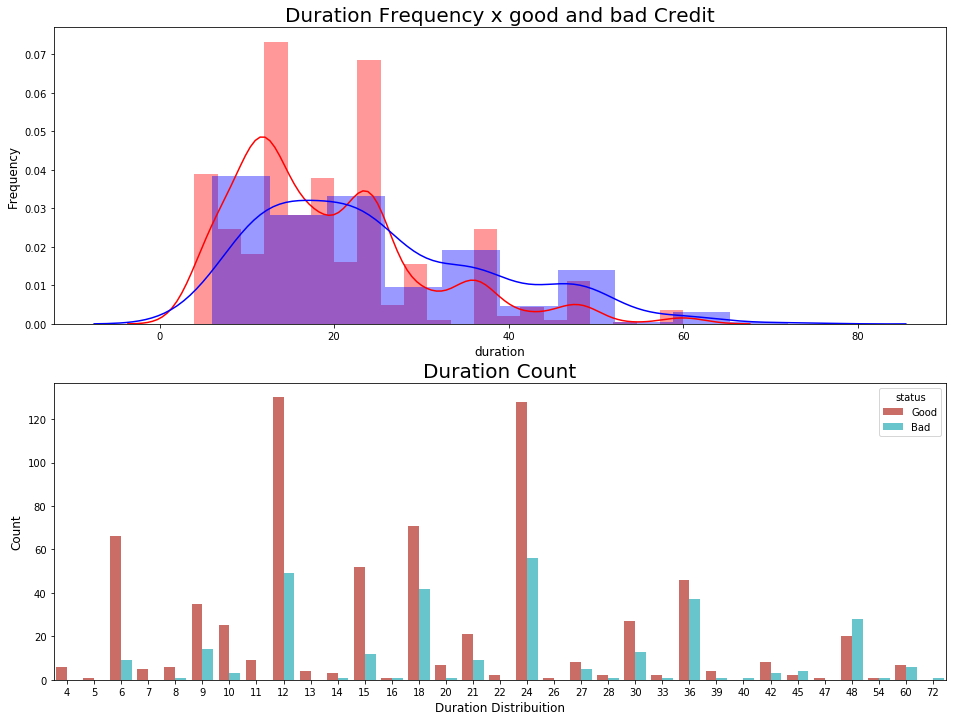

In [12]:
plt.figure(figsize = (16,12))
plt.subplot(211)
g2 = sn.distplot(dataset[dataset.status == 'Good'].duration, color='r')
g2 = sn.distplot(dataset[dataset.status == 'Bad'].duration, color='b')
g2.set_xlabel("duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)
plt.subplot(212)
g = sn.countplot(x="duration", data=dataset, 
              palette="hls",  hue = "status")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

La densidad más alta está entre [12 ~ 18 ~ 24] meses.<br>
Los creditos cuando superan los <b>24 meses </b> tiende a ser mayor su incumplimiento.

# **Prepación de los datos:** 

- Escalamiento de los datos numéricos
- Usando LabelEncoder para los algorimos que no soportan variables numericas

- Particionando los datos
- definiendo variables X and y variables para la prediccion

Cambiemos manualmente los atributos que tienen un aparente orden:

In [13]:
data =  dataset
#cambiemos manualmente las que tienen un aparente orden
data["checkin_account"] =data['checkin_account'].map({'A11': 1,'A12': 2,'A13': 3,'A14': 0})
data["saving_account"] =data['saving_account'].map({'A61': 1,'A62': 2,'A63': 3,'A64': 4,'A65': 0})
data["present_empl_since"] =data['present_empl_since'].map({'A72': 1,'A73': 2,'A74': 3,'A75': 4,'A71': 0})
data["job"] = data['job'].map({'A172': 1,'A173': 2,'A174': 3,'A171': 0})
data["status"] = data['status'].map({'Good': 1,'Bad': 2})

In [14]:
#Cambiammos las demas o dummy ?
enconder = defaultdict(LabelEncoder)
scaler = MinMaxScaler()
#Definimos las variables 
varDisc2 = ['credit_history','purpose','personal_status','other_debtors','property','other_install_plans','housing','telephone','foreign_worker','sex']
varNumeric2 = ['duration','credit_amount','interest_rate','residing_since','age','num_credits','dependents']
#
data[varNumeric2] = scaler.fit_transform(data[varNumeric2])
data[varDisc2] = data[varDisc2].apply(lambda x: enconder[x.name].fit_transform(x))

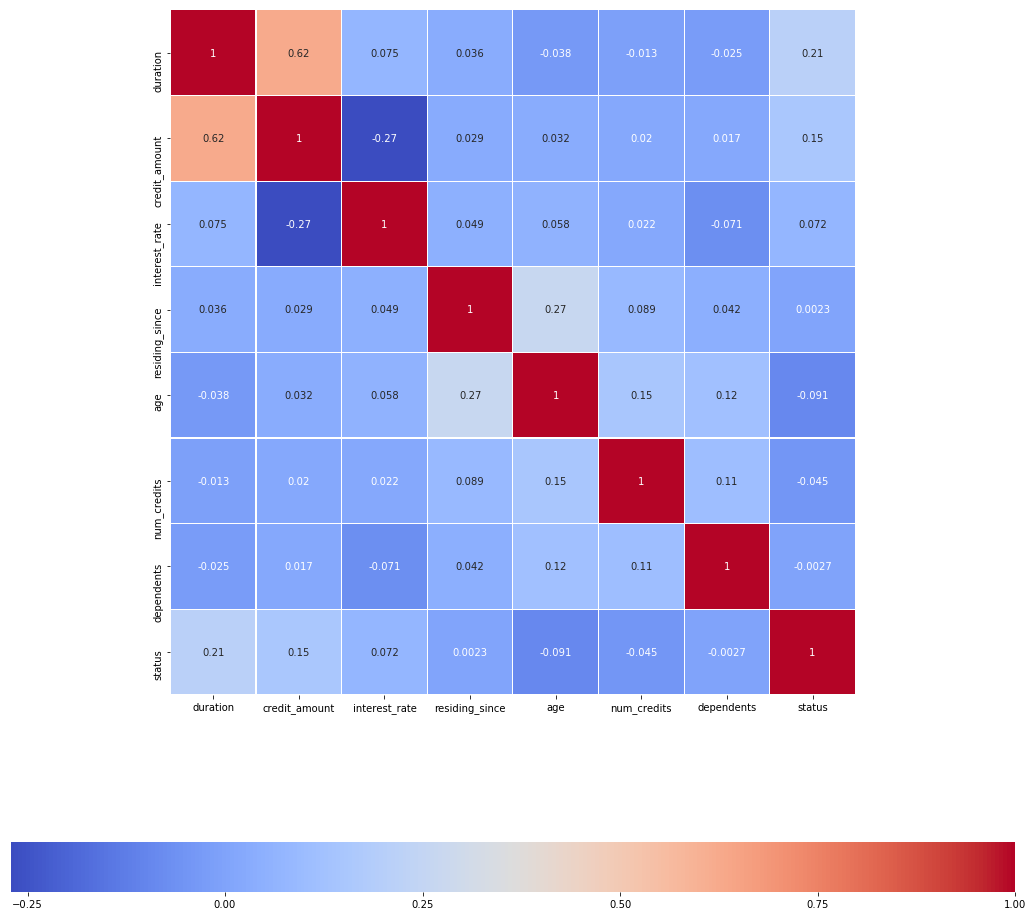

In [15]:
plt.figure(figsize=(18,18))
sn.heatmap(data[varNumeric].astype(float).corr(),linewidths=0.15,vmax=1.0, 
            square=True,  linecolor='white', annot=True,cmap="coolwarm",cbar=True,cbar_kws={"orientation": "horizontal"})

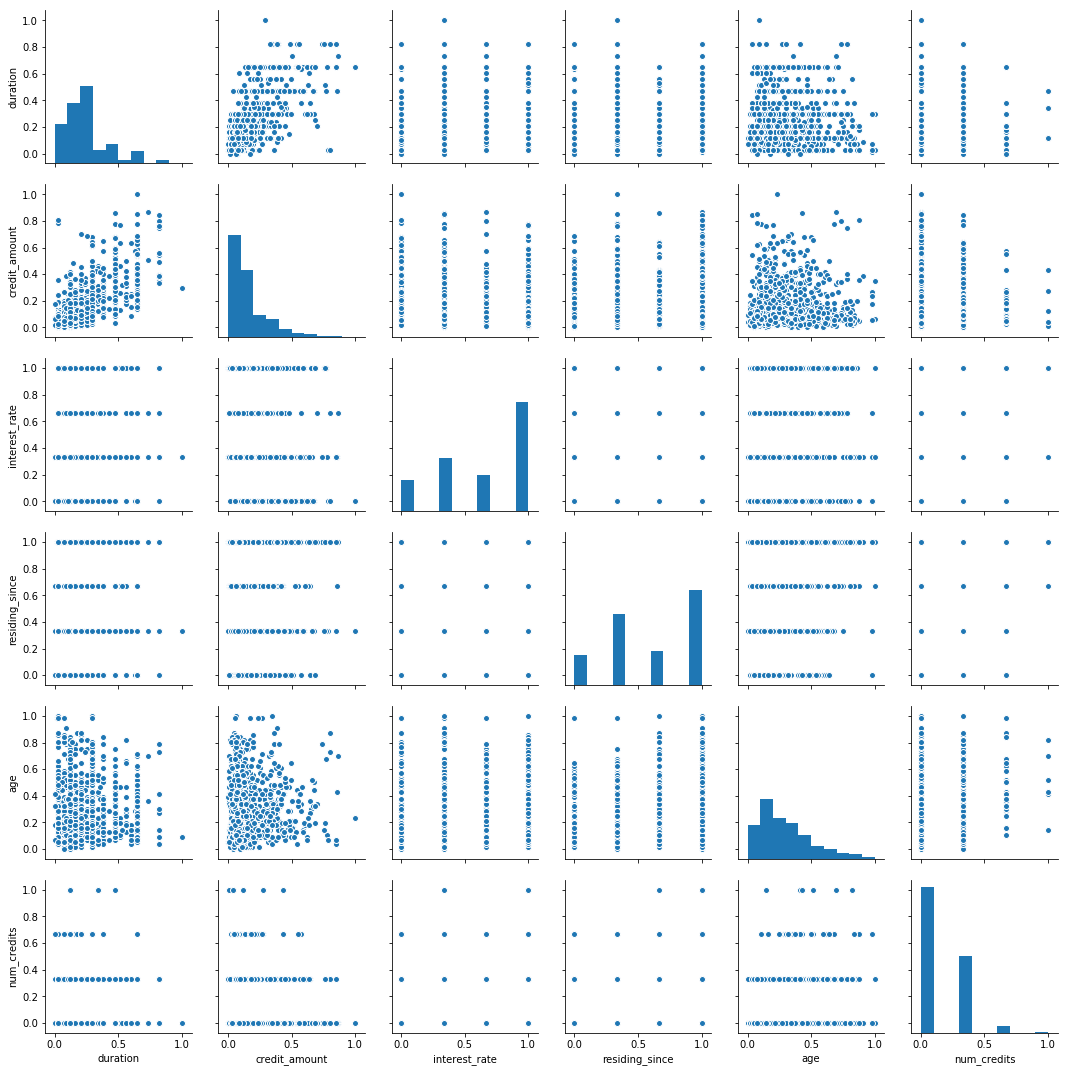

In [49]:
sn.pairplot(data[varNumeric].select_dtypes(include = ['float64', 'int64']).iloc[:, :-1] )

In [16]:
HTML(data.head(7).to_html())

,checkin_account,duration,credit_history,purpose,credit_amount,saving_account,present_empl_since,interest_rate,personal_status,other_debtors,residing_since,property,age,other_install_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,sex
0,1,0.029412,4,4,0.050567,0,4,1.000000,2,0,1.000000,0,0.857143,2,1,0.333333,2,0.0,1,0,1,1
1,2,0.647059,2,4,0.313690,1,2,0.333333,1,0,0.333333,0,0.053571,2,1,0.000000,2,0.0,0,0,2,0
2,0,0.117647,4,7,0.101574,1,3,0.333333,2,0,0.666667,0,0.535714,2,1,0.000000,1,1.0,0,0,1,1
3,1,0.558824,2,3,0.419941,1,3,0.333333,2,2,1.000000,1,0.464286,2,2,0.000000,2,1.0,0,0,1,1
4,1,0.294118,3,0,0.254209,1,2,0.666667,2,0,1.000000,3,0.607143,2,2,0.333333,2,1.0,0,0,2,1
5,0,0.470588,2,7,0.484483,0,2,0.333333,2,0,1.000000,3,0.285714,2,2,0.000000,1,1.0,1,0,1,1
6,0,0.294118,2,3,0.142236,3,4,0.666667,2,0,1.000000,1,0.607143,2,1,0.000000,2,0.0,0,0,1,1


In [17]:
y = data['status']
if 'status' in data.columns:
    dataset.drop('status', axis=1, inplace=True)
else:
    pass

A continuación Seleccionamos el conjunto de datos y de prueba.

In [18]:
x_train, x_test, y_train, y_test= train_test_split(data, y, test_size=0.3, random_state=42,stratify=y)
print("{} Muestras de Entrenamiento".format(y_train.shape))
print("{} Muestras de Prueba".format(y_test.shape))
print("DistibuciónY de Prueba:")
print(y_test.value_counts( normalize=False ))

(700,) Muestras de Entrenamiento
(301,) Muestras de Prueba
DistibuciónY de Prueba:
1    211
2     90
Name: status, dtype: int64


Intentaremos probar con dos diferentes estrategias para hacer <b>cross-validation</b>.<br>
'ShuffleSplit' funciona iterativamente no garantiza que todos las partes sean diferentes, <br>'KFold' simplemente divide el conjunto de datos en k partes.<br>
A continuación un pequeño ejemplo para diferenciar su funcionamiento:

In [21]:
X = np.arange(12)
print("ShuffleSplit:")
ss = ShuffleSplit(n_splits=5,test_size=0.2)
for train, test in ss.split(X):
    print("%s %s" % (train, test))
print("KFold:")
kf = KFold(n_splits=5,shuffle=True)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

ShuffleSplit:
[ 7 10  2  3  5  6  9  0  4] [ 1  8 11]
[ 9  1  6  5 10  0  7  8 11] [2 4 3]
[ 4 10  3  1  2  8  6  7  0] [ 9 11  5]
[ 3  1  8  5  2 10  9  7 11] [6 0 4]
[ 9 10  4 11  3  2  6  8  5] [1 0 7]
KFold:
[ 0  1  2  3  4  6  8  9 10] [ 5  7 11]
[ 2  4  5  6  7  8  9 10 11] [0 1 3]
[ 0  1  3  4  5  6  7  8 10 11] [2 9]
[ 0  1  2  3  5  7  8  9 10 11] [4 6]
[ 0  1  2  3  4  5  6  7  9 11] [ 8 10]


In [19]:
#Cross-validation strategies 
ss = ShuffleSplit(n_splits=10,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)

# **Modelos:**
- Pasando modelos con la configuración por defecto

Accuracy: 0.70100 


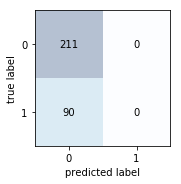

In [20]:
dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(x_train,y_train)
pred_dummy = dummy.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,pred_dummy)))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred_dummy))

El modelo dummy

Accuracy: 0.68771 
             precision    recall  f1-score   support

          1       0.74      0.85      0.79       211
          2       0.47      0.31      0.37        90

avg / total       0.66      0.69      0.67       301



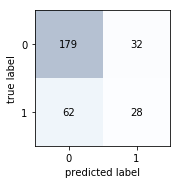

In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,pred_knn)))
print(classification_report(y_test, pred_knn))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred_knn))

Accuracy: 0.71429 
             precision    recall  f1-score   support

          1       0.72      0.97      0.83       211
          2       0.62      0.11      0.19        90

avg / total       0.69      0.71      0.64       301



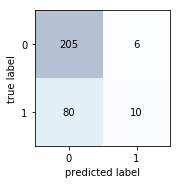

In [24]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test) 
print("Accuracy: %0.5f " % (accuracy_score(y_test,y_pred_svc)))
print(classification_report(y_test, y_pred_svc))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.74419 
             precision    recall  f1-score   support

          1       0.78      0.89      0.83       211
          2       0.61      0.40      0.48        90

avg / total       0.73      0.74      0.73       301



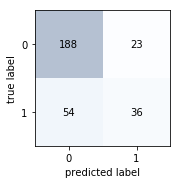

In [25]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,pred_logreg)))
print(classification_report(y_test, pred_logreg))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred_logreg))

Accuracy: 0.76412 
             precision    recall  f1-score   support

          1       0.78      0.93      0.85       211
          2       0.69      0.38      0.49        90

avg / total       0.75      0.76      0.74       301



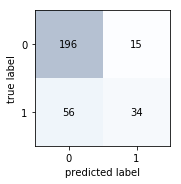

In [26]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test) 
print("Accuracy: %0.5f " % (accuracy_score(y_test,y_pred_rfc)))
print(classification_report(y_test, y_pred_rfc))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_rfc))

Hemos probado algunos modelos con sus parametros por defecto , intentemos ahora encontrar parametros que mejoren las metricas.

- vamos a probar una función en sklearn para graficar  la curva de aprendizaje

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

- Random Forests grid search

In [32]:
def fit_trees(algo, n_jobs, max_depth, n_estimators,cv):
    estimator = RandomForestClassifier() 

    #cv = ShuffleSplit(n_splits=10,test_size=0.2) 
    classifier = GridSearchCV(estimator=estimator, cv=cv, 
                                  param_grid=dict(n_estimators=n_estimators, max_depth=max_depth), n_jobs=n_jobs, scoring='f1')
        
    classifier.fit(x_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_)
    return cv, classifier.best_estimator_.max_depth, classifier.best_estimator_.n_estimators

In [33]:
max_depth=np.linspace(5,10,5) 
n_estimators=[100, 500, 1000]
cv,max_depth,n_estimators=fit_trees('Random Forests', n_jobs=10, max_depth=max_depth, n_estimators=n_estimators,cv=kf)

Best Estimator learned through GridSearch
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8.75, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

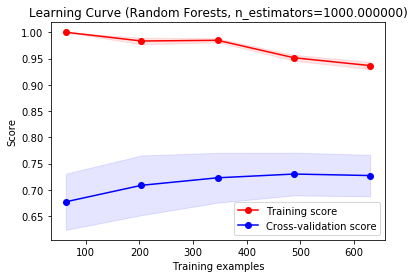

In [35]:
title = "Learning Curve (Random Forests, n_estimators=%.6f)" %(n_estimators) 
estimator = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth) 
plot_learning_curve(estimator, title, x_train, y_train, cv=cv) 

Accuracy: 0.77409 
             precision    recall  f1-score   support

          1       0.78      0.95      0.86       211
          2       0.76      0.36      0.48        90

avg / total       0.77      0.77      0.74       301



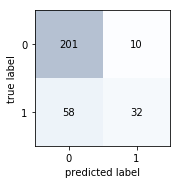

In [36]:
estimator.fit(x_train, y_train) 
y_pred_rdmf=estimator.predict(x_test) 
print("Accuracy: %0.5f " % (accuracy_score(y_test,y_pred_rdmf)))
print(classification_report(y_test, y_pred_rdmf))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_rdmf))

- Parece un ajuste razonable ,miraremos feature_importances_ para ver si podemos reducir la cantidad de atributos y ver que efectos tendra.

Mean Feature Importance: 0.047619


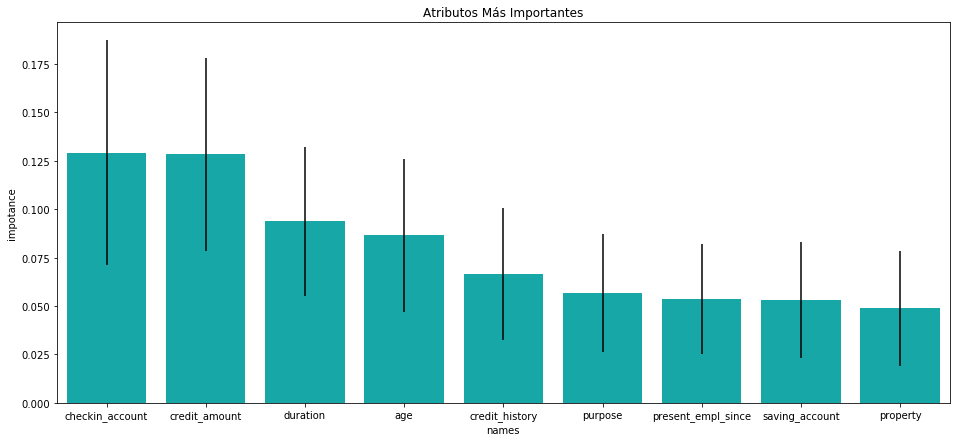

In [45]:
importances = estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
columns = list(data.columns)
indices = [i for i in indices if importances[i] > np.mean(importances)]
names = [columns[x] for x in list(indices)]
t_importance = {'indices': indices, 'names': names, 'impotance': importances[indices]}
plt.figure(figsize=(16,7))
plt.title("Atributos Más Importantes") 
plt.bar(range(len(names)), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xlim([-1, 10])
features = pd.DataFrame(data=t_importance)
sn.barplot(x="names", y="impotance", data=features,color="c")
print ("Mean Feature Importance: %.6f" %np.mean(importances))

In [50]:
#Redimensionamos los conjuntos con las variables mas relevantes
x_train_s = x_train[x_train.columns.intersection(names)]
x_test_s = x_test[x_test.columns.intersection(names)]
print(x_train_s.shape)
print(x_test_s.shape)

(700, 9)
(301, 9)


<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

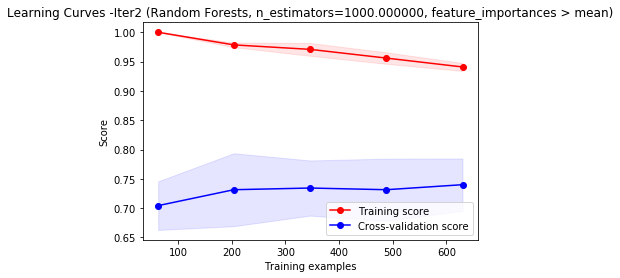

In [52]:
title = "Learning Curves (Random Forests, n_estimators=%.6f, feature_importances > mean)" %(n_estimators) 
estimator_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs=10)
plot_learning_curve(estimator_rf, title, x_train_s, y_train, cv=cv)

Accuracy: 0.79070 
             precision    recall  f1-score   support

          1       0.80      0.94      0.86       211
          2       0.76      0.43      0.55        90

avg / total       0.79      0.79      0.77       301



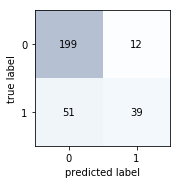

In [53]:
estimator_rf.fit(x_train_s, y_train) 
y_pred_rftop=estimator.predict(x_test_s) 
print("Accuracy: %0.5f " % (accuracy_score(y_test,y_pred_rftop)))
print(classification_report(y_test, y_pred_rftop))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_rftop))

<b>Observaciones:</b>Después de realizar una validación cruzada junto con un GridSearch y recortar dejando solo los atributos por encima de la media  y pudimos obtener aproximadamente el <b>79% </b>de precisión para el conjunto de prueba.

Dado que nuestro conjunto de datos es imbalanceado analicemos el comportamiento de las metricas al correr el modelo depues de usar over sampling

In [58]:
from imblearn.over_sampling import RandomOverSampler
sam = RandomOverSampler()
x_train_os ,y_train_os = sam.fit_sample(x_train_s,y_train)
dict(zip(*np.unique(y_train_os , return_counts= True)))

{1: 490, 2: 490}

<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

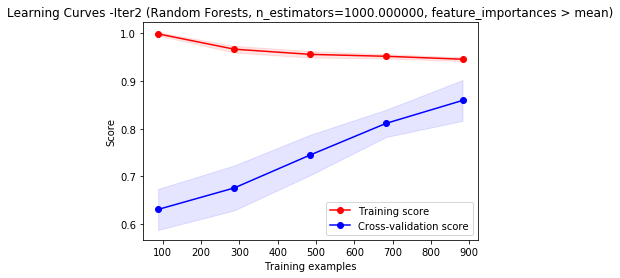

In [59]:
title = "Learning Curves -Iter2 (Random Forests, n_estimators=%.6f, feature_importances > mean)" %(n_estimators) 
estimator_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs=10)
plot_learning_curve(estimator_rf, title, x_train_os, y_train_os, cv=cv)

Accuracy: 0.75415 
             precision    recall  f1-score   support

          1       0.85      0.79      0.82       211
          2       0.58      0.67      0.62        90

avg / total       0.77      0.75      0.76       301



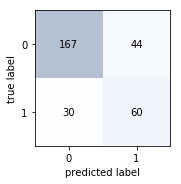

In [61]:
estimator_rf.fit(x_train_os, y_train_os) 
y_pred_rfos=estimator_rf.predict(x_test_s) 
print("Accuracy: %0.5f " % (accuracy_score(y_test,y_pred_rfos)))
print(classification_report(y_test, y_pred_rfos))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_rfos))

<b>Observaciones:</b> Al hacer el sobre muestreo permitió mejorar las metricas para la categoria menos frecuente (<i> en nuestro caso los <b>'malos'</b></i>)

- KNeighbors grid search

In [56]:
metrics = ['minkowski','euclidean','manhattan'] 
weights = ['uniform','distance'] 
numNeighbors = np.arange(5,15)
estimator = KNeighborsClassifier()
classifier= GridSearchCV(estimator=estimator,param_grid=dict(metric=metrics,weights=weights,n_neighbors=numNeighbors),cv=kf)
classifier.fit(x_train, y_train)
print (classifier.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='distance')


Accuracy: 0.72093 
             precision    recall  f1-score   support

          1       0.73      0.94      0.83       211
          2       0.60      0.20      0.30        90

avg / total       0.69      0.72      0.67       301



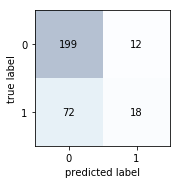

In [57]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,pred_knn)))
print(classification_report(y_test, pred_knn))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred_knn))

<b>Observaciones:</b>

- SVC grid search

In [63]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2,cv=kf)
grid.fit(x_train, y_train)
print (grid.best_estimator_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.5s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.7s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.9s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   8.6s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   4.9s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=  54.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total= 1.0min
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 44.0min finished


In [64]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy: 0.74086 
             precision    recall  f1-score   support

          1       0.75      0.95      0.84       211
          2       0.68      0.26      0.37        90

avg / total       0.73      0.74      0.70       301



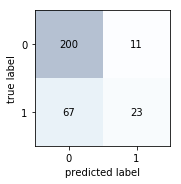

In [65]:
predic_svc = grid.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,predic_svc)))
print(classification_report(y_test, predic_svc))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, predic_svc))

<b>Observaciones:</b>

In [82]:
param_grid = {'penalty': ['l1','l2'], 'C': [0.1,1,4,8,100,1000]}
log_regrid = GridSearchCV(LogisticRegression(random_state=0),param_grid,cv=kf)
log_regrid.fit(x_train, y_train)
print (log_regrid.best_estimator_)

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy: 0.73754 
             precision    recall  f1-score   support

          1       0.78      0.88      0.82       211
          2       0.59      0.41      0.48        90

avg / total       0.72      0.74      0.72       301



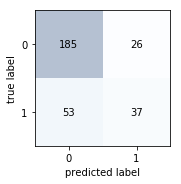

In [83]:
predic_lreg = log_regrid.predict(x_test)
print("Accuracy: %0.5f " % (accuracy_score(y_test,predic_lreg)))
print(classification_report(y_test, predic_lreg))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, predic_lreg))

<b>Comparaciones:</b><br>
En general al utilizar GridSearch para buscar hiper-parámetros que mejorar las métricas de nuestros modelos, se consiguió 
Mejorar respecto a los resultados obtenidos por defecto. <br>

El mejor acercamiento se logró al utilizar un <b>clasificador Ramdom forest</b> y aplicar cross-validation + GridSearch y dejando los atributos por encima de la media, así  pudimos obtener los mejores valores para las diferentes métricas.


![title](img/title.png)